In [1]:
import numpy as np 
import decimal
from decimal import Decimal

In [2]:
decimal.getcontext().prec = 256

In [3]:
Decimal(1) / Decimal(49)

Decimal('0.02040816326530612244897959184')

In [4]:
print(np.finfo(np.float32).eps, np.finfo(np.float64).eps)

1.1920929e-07 2.220446049250313e-16


In [5]:
L = range(1000)
%timeit [i**2 for i in L]

179 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
a = np.arange(1000)
%timeit a**2

924 ns ± 32.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [7]:
a = np.array([1,2,3])
b = np.copy(a)
b[0] = 0
print(a,b)

[1 2 3] [0 2 3]


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

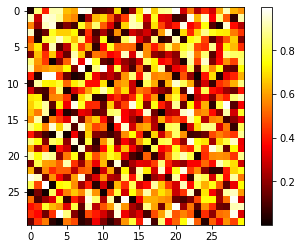

In [9]:
image = np.random.rand(30,30)
plt.imshow(image, cmap=plt.cm.hot)
plt.colorbar();

In [10]:
np.diag(np.arange(3))

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [11]:
np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [12]:
a = np.random.rand(3)
b = a
print(np.may_share_memory(a, b))
print(a, b)

True
[0.84169555 0.68878879 0.90003669] [0.84169555 0.68878879 0.90003669]


In [13]:
def cumsum(x):
    y = np.copy(x)
    y[0] = x[0]
    for ii in range(1, x.size):
        y[ii] = y[ii-1] + x[ii]
    return y

In [14]:
N = 10000000
x = np.random.rand(N)

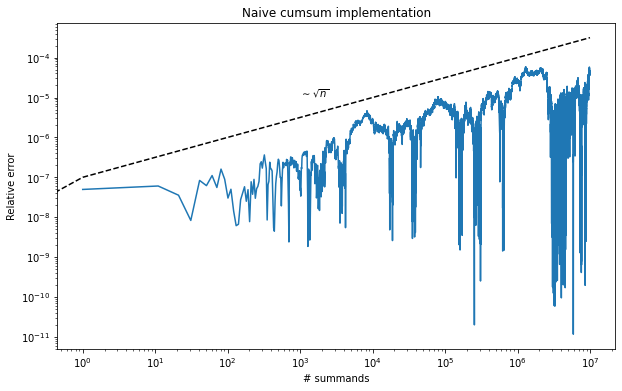

In [18]:
y32 = np.cumsum(x.astype(np.float32))
y64 = np.cumsum(x)
err = np.abs(y32 - y64) / np.abs(y64)
n = np.arange(1, err.size, 10)
plt.figure(figsize=(10,6))
plt.loglog(n, err[n])
plt.loglog(np.arange(err.size), np.sqrt(np.arange(err.size))*1e-7, '--k')
plt.ylabel("Relative error")
plt.xlabel("# summands")
plt.text(1e3, 1e-5, "$\sim \sqrt{n}$")
plt.title("Naive cumsum implementation");